<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Grid Search Lab

---


Now we want to use grid search on the wine dataset to tune a linear regression model including regularisation parameters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import GridSearchCV
import patsy

###  Load the wine dataset

In [2]:
# Load dataset
df = pd.read_csv("winequality_merged.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Clean the column names by replacing spaces by underscore

In [6]:
ucols = []
for col in df.columns:
    print(col)
    ucols.append(col.replace(" ", "_"))
df.columns = ucols
df.columns

fixed_acidity
volatile_acidity
citric_acid
residual_sugar
chlorides
free_sulfur_dioxide
total_sulfur_dioxide
density
pH
sulphates
alcohol
quality
red_wine


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')

In [10]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Create Feature matrix and target (X and y)

In [12]:
df['quality']

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
6467    6
6468    6
6469    7
6470    6
6471    5
6472    6
6473    6
6474    6
6475    7
6476    5
6477    4
6478    6
6479    6
6480    6
6481    5
6482    6
6483    5
6484    6
6485    7
6486    7
6487    5
6488    6
6489    6
6490    6
6491    5
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

In [19]:
features = [x for x in df if x != 'quality']
X = df[features]
y = df['quality']
print(X.shape)
print(y.shape)

(6497, 12)
(6497,)


### Use the standard scaler to rescale the feature matrix

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

Xss = scaler.fit_transform(X)
Xss = pd.DataFrame(Xss, index=X.index, columns=X.columns)
Xss.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,red_wine
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1.75019
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,1.75019
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,1.75019
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,1.75019
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1.75019


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1641fef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a53ef60>]], dtype=object)

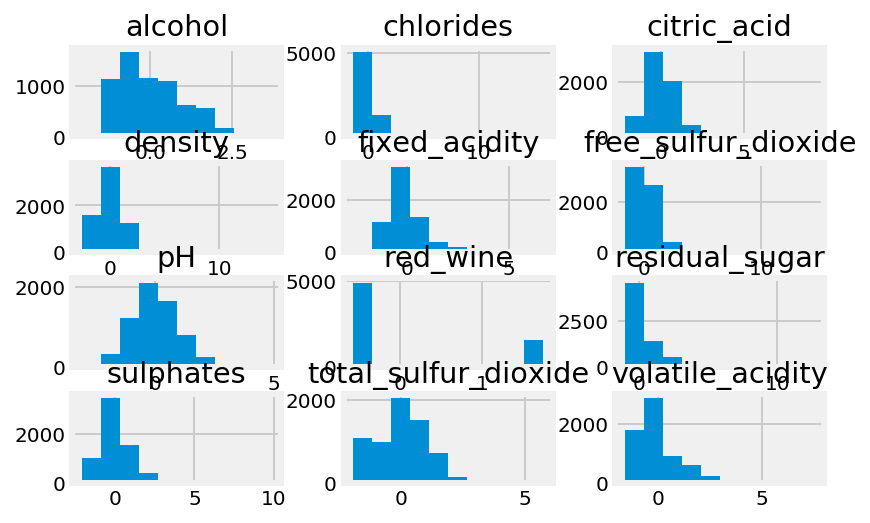

In [22]:
Xss.hist()

### Setup search parameters for grid search on the regularisation strength alpha

Hint: Look up `np.linspace` and `np.logspace` for efficient ways of defining search parameters for alpha.

In [35]:
# Setup our GridSearch Parmaters
alpha_parameters = np.linspace(0, .15, num=100)

In [36]:
search_parameters = {'alpha': alpha_parameters}
search_parameters

{'alpha': array([ 0.        ,  0.00151515,  0.0030303 ,  0.00454545,  0.00606061,
         0.00757576,  0.00909091,  0.01060606,  0.01212121,  0.01363636,
         0.01515152,  0.01666667,  0.01818182,  0.01969697,  0.02121212,
         0.02272727,  0.02424242,  0.02575758,  0.02727273,  0.02878788,
         0.03030303,  0.03181818,  0.03333333,  0.03484848,  0.03636364,
         0.03787879,  0.03939394,  0.04090909,  0.04242424,  0.04393939,
         0.04545455,  0.0469697 ,  0.04848485,  0.05      ,  0.05151515,
         0.0530303 ,  0.05454545,  0.05606061,  0.05757576,  0.05909091,
         0.06060606,  0.06212121,  0.06363636,  0.06515152,  0.06666667,
         0.06818182,  0.06969697,  0.07121212,  0.07272727,  0.07424242,
         0.07575758,  0.07727273,  0.07878788,  0.08030303,  0.08181818,
         0.08333333,  0.08484848,  0.08636364,  0.08787879,  0.08939394,
         0.09090909,  0.09242424,  0.09393939,  0.09545455,  0.0969697 ,
         0.09848485,  0.1       ,  0.10151

### Perform grid search using Lasso regularisation 

In [37]:
from sklearn.linear_model import Lasso

In [38]:
# Intialize a blank model object
lasso_reg = Lasso()

# Initialize gridsearch
estimator = GridSearchCV(
    lasso_reg, # estimator
    search_parameters, # hyper-parameter space to search 
    cv=5, # number of folds
    scoring="neg_mean_squared_error" # scoring metric to optimise for
)

# Fit some data
results = estimator.fit(Xss, y)
print( results.best_estimator_)

/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use t

Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Obtain performance metrics and decide on an optimal parameter for alpha

In [42]:
print( "Best estimator:")
print( results.best_estimator_)

print() 

print( "Best score:")
print( np.sqrt(-1 * results.best_score_))

print()

print( "Best params:")
print( results.best_params_)

print()

print( "Grid parameters")
print( results.param_grid)

Best estimator:
Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Best score:
0.750101748615

Best params:
{'alpha': 0.0}

Grid parameters
{'alpha': array([ 0.        ,  0.00151515,  0.0030303 ,  0.00454545,  0.00606061,
        0.00757576,  0.00909091,  0.01060606,  0.01212121,  0.01363636,
        0.01515152,  0.01666667,  0.01818182,  0.01969697,  0.02121212,
        0.02272727,  0.02424242,  0.02575758,  0.02727273,  0.02878788,
        0.03030303,  0.03181818,  0.03333333,  0.03484848,  0.03636364,
        0.03787879,  0.03939394,  0.04090909,  0.04242424,  0.04393939,
        0.04545455,  0.0469697 ,  0.04848485,  0.05      ,  0.05151515,
        0.0530303 ,  0.05454545,  0.05606061,  0.05757576,  0.05909091,
        0.06060606,  0.06212121,  0.06363636,  0.06515152,  0.06666667,
        0.06818182,  0.06969697,  0.07121212,  0.07272727,  0

In [43]:
resultsdf = pd.DataFrame(results.cv_results_)

/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwarg

### Plot the model scores obtained for the different alphas

In [44]:
resultsdf.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.068830,0.000623,-0.562653,-0.534103,0,{'alpha': 0.0},1,-0.506917,-0.555907,-0.636052,...,-0.596558,-0.523005,-0.559844,-0.531887,-0.513878,-0.545202,0.005553,0.000120,0.049058,0.014903
1,0.006608,0.000292,-0.563387,-0.534354,0.00151515,{'alpha': 0.00151515151515},2,-0.507159,-0.556188,-0.637106,...,-0.598106,-0.523253,-0.560458,-0.532156,-0.514090,-0.545426,0.000749,0.000011,0.049483,0.014912
2,0.005301,0.000297,-0.564796,-0.535101,0.0030303,{'alpha': 0.0030303030303},3,-0.508820,-0.557020,-0.638492,...,-0.600193,-0.523991,-0.561900,-0.532959,-0.514559,-0.546094,0.001182,0.000033,0.049704,0.014939
3,0.005540,0.000442,-0.566668,-0.536294,0.00454545,{'alpha': 0.00454545454545},5,-0.511038,-0.558287,-0.640127,...,-0.602783,-0.525196,-0.564109,-0.534258,-0.515267,-0.547183,0.000908,0.000092,0.049893,0.014963
4,0.005245,0.000312,-0.567113,-0.537589,0.00606061,{'alpha': 0.00606060606061},9,-0.506704,-0.559108,-0.639649,...,-0.605842,-0.526863,-0.567129,-0.536082,-0.516234,-0.548714,0.001067,0.000027,0.050994,0.014971


In [45]:
resultsdf.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_alpha', 'params', 'rank_test_score',
       'split0_test_score', 'split0_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

In [49]:
np.sqrt((-1 * resultsdf['mean_test_score'])).max()

0.7885864505668625

### Fit a Lasso regression model on your features and target for all alpha values you used in your grid search and plot how the model coefficients change with alpha.

### Bonus: Ridge regression

Do the same using ridge regression adjusting the grid search parameters to the appropriate range. 

Docs: 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

In [ ]:
from sklearn.linear_model import Ridge

## Bonus: Elastic Net regression

Do the same using elasticnet adjusting the grid search parameters to the appropriate range. 

Docs: 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

http://scikit-learn.org/stable/modules/linear_model.html#elastic-net

In [ ]:
from sklearn.linear_model import ElasticNet